# <center>实验二 银行产品推荐</center>
<center>金融学（互联网+金融）1602班 沈吉梅 20160756</center>

## 1.数据预处理

### 变量说明

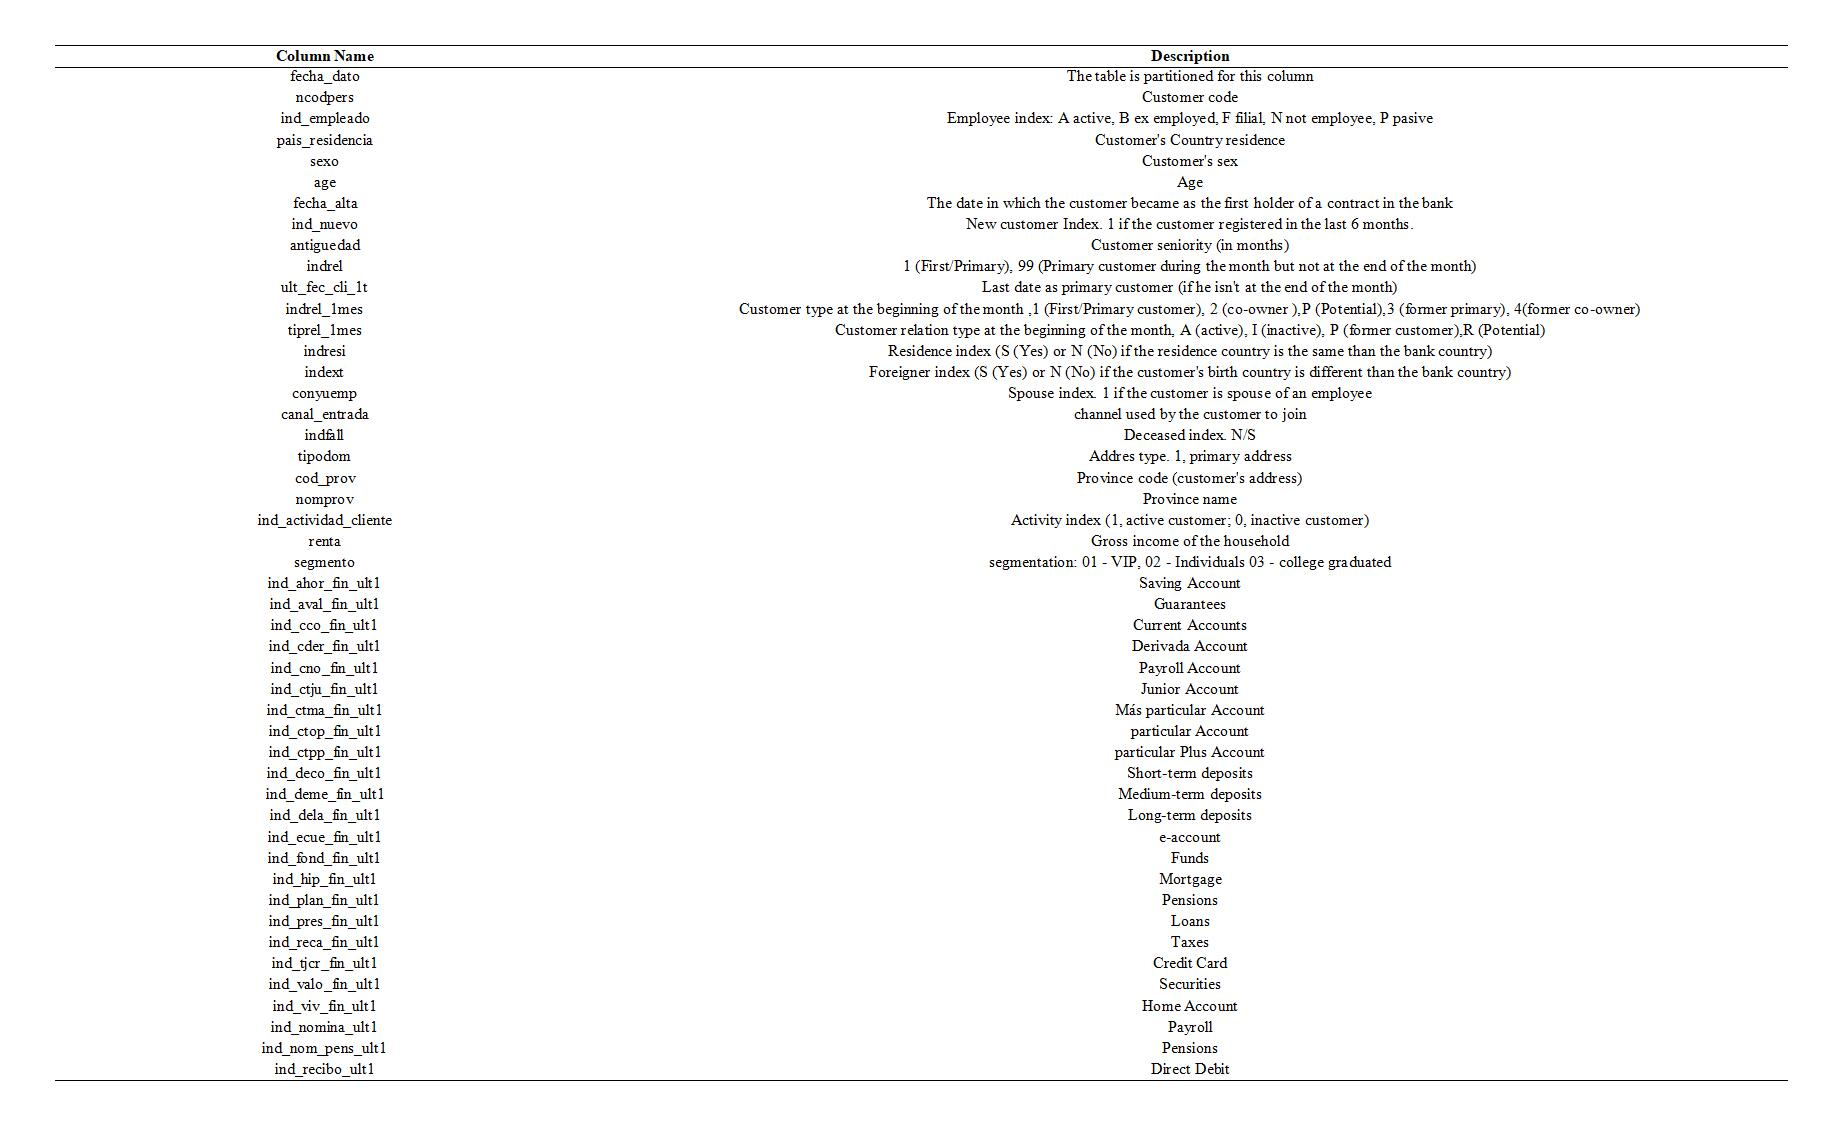

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('C:/Users/Jimei/Desktop/train_ver2.csv')
sample = pd.read_csv('sample_submission.csv')

C:\Users\Jimei\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head(5)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
train.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

In [5]:
train["fecha_dato"] = pd.to_datetime(train["fecha_dato"],format="%Y-%m-%d")
train["fecha_alta"] = pd.to_datetime(train["fecha_alta"],format="%Y-%m-%d")
train["fecha_dato"].unique()

array(['2015-01-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-28T00:00:00.000000000', '2015-04-28T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-28T00:00:00.000000000', '2015-08-28T00:00:00.000000000',
       '2015-09-28T00:00:00.000000000', '2015-10-28T00:00:00.000000000',
       '2015-11-28T00:00:00.000000000', '2015-12-28T00:00:00.000000000',
       '2016-01-28T00:00:00.000000000', '2016-02-28T00:00:00.000000000',
       '2016-03-28T00:00:00.000000000', '2016-04-28T00:00:00.000000000',
       '2016-05-28T00:00:00.000000000'], dtype='datetime64[ns]')

### 缺失值处理

In [6]:
train.isna().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

In [7]:
train.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07,1.364731e+07,1.364731e+07,1.364731e+07,...,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.363125e+07,1.363125e+07,1.364731e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05,1.022912e-04,2.315475e-05,6.554837e-01,...,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,5.472434e-02,5.942854e-02,1.279162e-01
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05,1.011340e-02,4.811883e-03,4.752103e-01,...,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,2.274414e-01,2.364250e-01,3.339965e-01
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
print(list(train.age.unique()))

[' 35', ' 23', ' 22', ' 24', ' 65', ' 28', ' 25', ' 26', ' 53', ' 27', ' 32', ' 37', ' 31', ' 39', ' 63', ' 33', ' 55', ' 42', ' 58', ' 38', ' 50', ' 30', ' 45', ' 44', ' 36', ' 29', ' 60', ' 57', ' 67', ' 47', ' NA', ' 34', ' 48', ' 46', ' 54', ' 84', ' 15', ' 12', '  8', '  6', ' 83', ' 40', ' 77', ' 69', ' 52', ' 59', ' 43', ' 10', '  9', ' 49', ' 41', ' 51', ' 78', ' 16', ' 11', ' 73', ' 62', ' 66', ' 17', ' 68', ' 82', ' 95', ' 96', ' 56', ' 61', ' 79', ' 72', ' 14', ' 19', ' 13', ' 86', ' 64', ' 20', ' 89', ' 71', '  7', ' 70', ' 74', ' 21', ' 18', ' 75', '  4', ' 80', ' 81', '  5', ' 76', ' 92', ' 93', ' 85', ' 91', ' 87', ' 90', ' 94', ' 99', ' 98', ' 88', ' 97', '100', '101', '106', '103', '  3', '  2', '102', '104', '111', '107', '109', '105', '112', '115', '110', '116', '108', '113', 37, 81, 43, 30, 45, 41, 67, 59, 46, 36, 47, 69, 39, 44, 40, 38, 34, 42, 31, 35, 48, 60, 54, 51, 33, 62, 50, 11, 57, 55, 85, 80, 70, 32, 52, 94, 61, 13, 29, 49, 76, 28, 63, 10, 88, 68, 64, 58, 56

In [9]:
train['age'] = train['age'].replace(' NA', '0')

In [10]:
train['age'] = train['age'].astype('float64')

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt
age_series = train.age.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(age_series.index.astype('int'), age_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

<Figure size 1200x400 with 1 Axes>

In [12]:
train.age.mean()

40.09980832118625

In [13]:
def getAge(row):
    mean_age = 40.
    min_age = 20.
    max_age = 100.
    range_age = max_age - min_age
    age = row['age'].strip()
    if age == '0' or age == '':
        age = mean_age
    else:
        age = float(age)
        if age < min_age:
            age = min_age
        elif age > max_age:
            age = max_age
    return round( (age - min_age) / range_age, 4)

In [14]:
print(list(train.antiguedad.unique()))

['      6', '     35', '     34', '     NA', '     33', '     31', '     21', '     16', '     27', '      9', '     22', '     13', '     29', '      8', '     11', '     10', '     28', '     24', '      7', '     25', '     14', '     26', '     12', '     23', '      1', '     18', '      4', '      3', '     17', '     32', '     30', '     20', '     15', '     19', '    157', '     36', '      5', '     40', '     38', '     37', '     39', '      0', '      2', '     47', '     44', '     42', '     46', '     45', '     43', '     41', '     57', '     48', '     52', '     49', '     50', '     56', '     58', '     51', '     55', '     54', '     53', '     59', '     62', '     61', '     60', '     63', '    139', '    165', '    118', '    164', '    142', '     94', '    159', '    143', '    105', '    151', '    162', '    137', '    150', '    128', '    122', '    156', '    119', '    160', '     79', '     95', '    132', '    161', '     98', '    127', '     72'

In [15]:
train['antiguedad'] = train['antiguedad'].replace('     NA', '0')

In [16]:
train['antiguedad'] = train['antiguedad'].astype('float64')

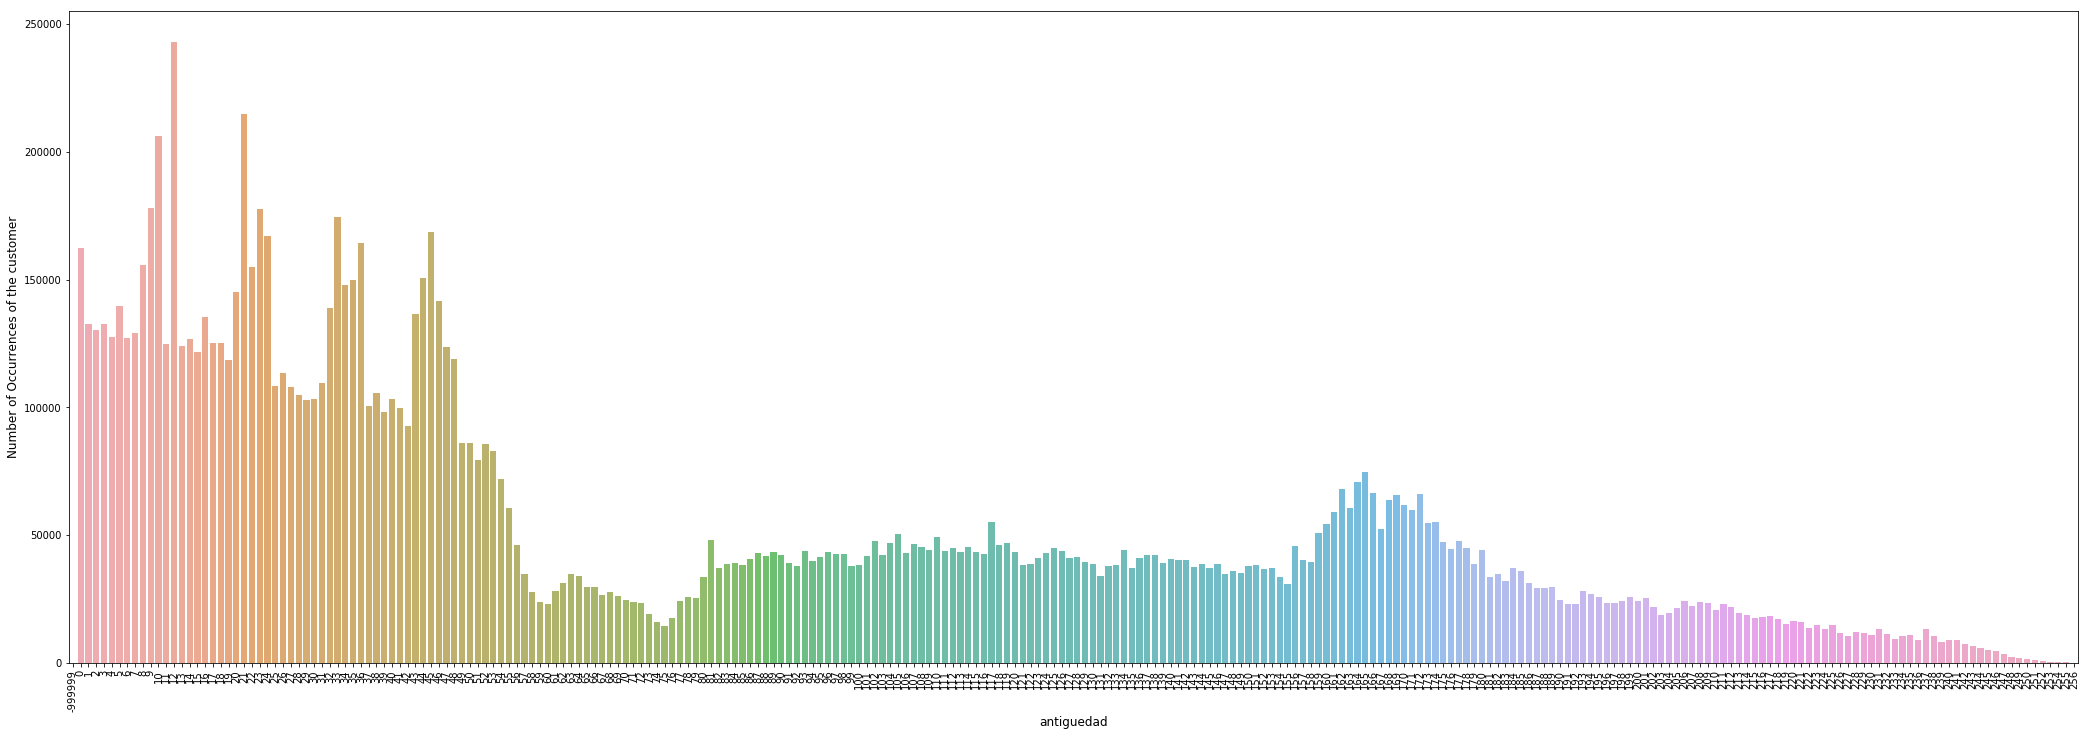

In [17]:
antiguedad_series = train.antiguedad.value_counts()
plt.figure(figsize=(36,12))
sns.barplot(antiguedad_series.index.astype('int'), antiguedad_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('antiguedad', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [18]:
def getCustSeniority(row):
    min_value = 0.
    max_value = 256.
    range_value = max_value - min_value
    missing_value = 0.
    cust_seniority = row['antiguedad'].strip()
    if cust_seniority == 'NA' or cust_seniority == '':
        cust_seniority = missing_value
    else:
        if cust_seniority < min_value:
            cust_seniority = min_value
        elif cust_seniority > max_value:
            cust_seniority = max_value
    cust_seniority = float(cust_seniority)
    return round((cust_seniority-min_value) / range_value, 4)

In [19]:
# print(list(train.renta.unique()))
'''
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_windbow=3.0 (secs)
'''

'\nIOPub data rate exceeded.\nThe notebook server will temporarily stop sending output\nto the client in order to avoid crashing it.\nTo change this limit, set the config variable\n`--NotebookApp.iopub_data_rate_limit`.\n\nCurrent values:\nNotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)\nNotebookApp.rate_limit_windbow=3.0 (secs)\n'

In [20]:
train['renta'] = train['renta'].replace('NA', '0')

In [21]:
train['renta'] = train['renta'].astype('float64')

In [22]:
train['renta'].all()

True

In [23]:
train.renta.isnull().sum()

2794375

In [24]:
train.renta.mean()

134254.3182380867

In [25]:
train.loc[train.renta.isnull(),"renta"] = train.loc[train.renta.notnull(),"renta"].median()
train.sort_values(by="fecha_dato",inplace=True)

In [26]:
train["ind_nuevo"].isnull().sum()

27734

In [27]:
months_active = train.loc[train["ind_nuevo"].isnull(),:].groupby("ncodpers", sort=False).size()
months_active.max()

6

In [28]:
train.loc[train["ind_nuevo"].isnull(),"ind_nuevo"] = 1

In [29]:
train.antiguedad = pd.to_numeric(train.antiguedad,errors="coerce")

In [30]:
train.loc[train["antiguedad"].isnull(),"ind_nuevo"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ind_nuevo, dtype: float64

In [31]:
dates=train.loc[:,"fecha_alta"].sort_values().reset_index()
median_date = int(np.median(dates.index.values))
train.loc[train.fecha_alta.isnull(),"fecha_alta"] = dates.loc[median_date,"fecha_alta"]
train["fecha_alta"].describe()

count                13647309
unique                   6756
top       2014-07-28 00:00:00
freq                    57389
first     1995-01-16 00:00:00
last      2016-05-31 00:00:00
Name: fecha_alta, dtype: object

In [32]:
pd.Series([i for i in train.indrel]).value_counts()

1.0     13594782
99.0       24793
dtype: int64

In [33]:
train.drop(["tipodom","cod_prov"],axis=1,inplace=True)

In [34]:
np.sum(train["ind_actividad_cliente"].isnull())

27734

In [35]:
train.loc[train.ind_actividad_cliente.isnull(),"ind_actividad_cliente"] = \
train["ind_actividad_cliente"].median()

In [36]:
train.nomprov.unique()

array(['MALAGA', 'MADRID', 'PALMAS, LAS', 'BADAJOZ', 'BIZKAIA', 'CADIZ',
       'ALICANTE', 'ZAMORA', 'BARCELONA', 'GIPUZKOA', 'GUADALAJARA', nan,
       'SEVILLA', 'VALENCIA', 'CANTABRIA', 'CORUÑA, A', 'ALMERIA',
       'PONTEVEDRA', 'GIRONA', 'AVILA', 'SALAMANCA',
       'SANTA CRUZ DE TENERIFE', 'SEGOVIA', 'TOLEDO', 'LERIDA',
       'ASTURIAS', 'GRANADA', 'MURCIA', 'HUELVA', 'LUGO', 'PALENCIA',
       'BURGOS', 'TARRAGONA', 'CIUDAD REAL', 'ZARAGOZA', 'BALEARS, ILLES',
       'CASTELLON', 'OURENSE', 'VALLADOLID', 'RIOJA, LA', 'CORDOBA',
       'CUENCA', 'ALBACETE', 'HUESCA', 'NAVARRA', 'CACERES', 'MELILLA',
       'JAEN', 'LEON', 'SORIA', 'ALAVA', 'TERUEL', 'CEUTA'], dtype=object)

In [37]:
train.loc[train.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"

In [38]:
train.loc[train.nomprov.isnull(),"nomprov"] = "UNKNOWN"

In [39]:
train.loc[train.indrel.isnull(),"indrel"] = 1

In [40]:
train.ind_nomina_ult1.isnull().sum()

16063

In [41]:
train.loc[train.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
train.loc[train.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

In [42]:
string_data = train.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]
for col in missing_columns:
    print("Unique values for {0}:\n{1}\n".format(col,string_data[col].unique()))
del string_data

Unique values for ind_empleado:
['N' 'F' 'A' 'B' nan 'S']

Unique values for pais_residencia:
['ES' nan 'PT' 'NL' 'AD' 'IN' 'US' 'FR' 'GB' 'IT' 'DE' 'MX' 'CL' 'CO' 'CH'
 'CR' 'PE' 'JP' 'AT' 'AR' 'AE' 'BE' 'MA' 'CI' 'SE' 'BR' 'FI' 'RS' 'KE'
 'RU' 'VE' 'CU' 'EC' 'KR' 'DO' 'AU' 'LU' 'GH' 'CZ' 'PA' 'IE' 'BO' 'CM'
 'CA' 'ZA' 'GR' 'RO' 'KH' 'IL' 'NG' 'CN' 'DK' 'NZ' 'MM' 'SG' 'UY' 'NI'
 'EG' 'GI' 'PH' 'KW' 'VN' 'TH' 'NO' 'GQ' 'BY' 'AO' 'UA' 'TR' 'PL' 'GA'
 'GE' 'BG' 'HR' 'PR' 'HK' 'HN' 'BA' 'MD' 'SK' 'TN' 'QA' 'TG' 'SA' 'MR'
 'DZ' 'LB' 'SV' 'PK' 'PY' 'LY' 'MK' 'EE' 'SN' 'MZ' 'GT' 'GN' 'TW' 'IS'
 'LT' 'CD' 'KZ' 'BZ' 'CF' 'GM' 'ET' 'SL' 'GW' 'LV' 'OM' 'CG' 'ML' 'HU'
 'AL' 'DJ' 'JM' 'ZW' 'BM' 'MT']

Unique values for sexo:
['H' 'V' nan]

Unique values for ult_fec_cli_1t:
[nan '2015-07-15' '2015-07-03' '2015-07-22' '2015-07-20' '2015-07-28'
 '2015-07-17' '2015-07-07' '2015-07-06' '2015-07-14' '2015-07-01'
 '2015-07-30' '2015-07-09' '2015-07-29' '2015-07-21' '2015-07-13'
 '2015-07-10' '2015-07-16'

In [43]:
train.loc[train.indfall.isnull(),"indfall"] = "N"
train.loc[train.tiprel_1mes.isnull(),"tiprel_1mes"] = "A"
train.tiprel_1mes = train.tiprel_1mes.astype("category")

map_dict = { 1.0  : "1",
            "1.0" : "1",
            "1"   : "1",
            "3.0" : "3",
            "P"   : "P",
            3.0   : "3",
            2.0   : "2",
            "3"   : "3",
            "2.0" : "2",
            "4.0" : "4",
            "4"   : "4",
            "2"   : "2"}

train.indrel_1mes.fillna("P",inplace=True)
train.indrel_1mes = train.indrel_1mes.apply(lambda x: map_dict.get(x,x))
train.indrel_1mes = train.indrel_1mes.astype("category")


unknown_cols = [col for col in missing_columns if col not in ["indfall","tiprel_1mes","indrel_1mes"]]
for col in unknown_cols:
    train.loc[train[col].isnull(),col] = "UNKNOWN"

In [44]:
train.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t           False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
conyuemp                 False
canal_entrada            False
indfall                  False
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme

In [45]:
train["ncodpers"].count()

13647309

In [46]:
train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
416967,2015-01-28,15892,F,ES,H,61.0,1995-01-16,0.0,246.0,1.0,...,0,0,0,1,1,1,0,0.0,0.0,1
416968,2015-01-28,15893,N,ES,V,62.0,1997-10-03,0.0,246.0,1.0,...,0,0,0,0,0,1,0,0.0,0.0,0
416969,2015-01-28,15894,A,ES,V,59.0,1995-01-16,0.0,246.0,1.0,...,0,0,0,1,1,1,0,1.0,1.0,1
416970,2015-01-28,15895,A,ES,H,49.0,1995-01-16,0.0,208.0,1.0,...,0,1,0,1,1,1,0,0.0,0.0,1


## 2.模型建立

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from collections import defaultdict

In [48]:
usecols = ['ncodpers', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']
train=train[usecols]

In [49]:
train = train.drop_duplicates(['ncodpers'], keep='last')
models = {}
model_preds = {}
id_preds = defaultdict(list)
ids = train['ncodpers'].values
for c in train.columns:
    if c != 'ncodpers':
        print(c)
        y_train = train[c]
        x_train = train.drop([c, 'ncodpers'], 1)
        
        clf = LogisticRegression()
        clf.fit(x_train, y_train)
        p_train = clf.predict_proba(x_train)[:,1]
        models[c] = clf
        model_preds[c] = p_train
        for id, p in zip(ids, p_train):
            id_preds[id].append(p)
            
        print(roc_auc_score(y_train, p_train))

ind_ahor_fin_ult1
0.7921505585425102
ind_aval_fin_ult1
0.9794712736076367
ind_cco_fin_ult1
0.6501686808378344
ind_cder_fin_ult1
0.7889473557316506
ind_cno_fin_ult1
0.9714726442045934
ind_ctju_fin_ult1
0.8655533428519266
ind_ctma_fin_ult1
0.6615937089830577
ind_ctop_fin_ult1
0.6127918406721888
ind_ctpp_fin_ult1
0.7223750178097768
ind_deco_fin_ult1
0.8888403119369325
ind_deme_fin_ult1
0.8675208408778923
ind_dela_fin_ult1
0.7819443158697608
ind_ecue_fin_ult1
0.775343267455684
ind_fond_fin_ult1
0.8565750495454116
ind_hip_fin_ult1
0.9180935477344321
ind_plan_fin_ult1
0.848118726819725
ind_pres_fin_ult1
0.7097390918230854
ind_reca_fin_ult1
0.8344131251196754
ind_tjcr_fin_ult1
0.9051590634834452
ind_valo_fin_ult1
0.8408023042818402
ind_viv_fin_ult1
0.767965995697736
ind_nomina_ult1
0.9981800111971146
ind_nom_pens_ult1
0.998311131001897
ind_recibo_ult1
0.867506551654103


In [50]:
already_active = {}
for row in train.values:
    row = list(row)
    id = row.pop(0)
    active = [c[0] for c in zip(train.columns[1:], row) if c[1] > 0]
    already_active[id] = active

train_preds = {}
for id, p in id_preds.items():
    preds = [i[0] for i in sorted([i for i in zip(train.columns[1:], p) if i[0] not in already_active[id]],
                                  key=lambda i:i [1], 
                                  reverse=True)[:7]]
    train_preds[id] = preds
    
test_preds = []
for row in sample.values:
    id = row[0]
    p = train_preds[id]
    test_preds.append(' '.join(p))

In [51]:
sample['added_products'] = test_preds

In [52]:
sample.to_csv('collab_sub.csv', index=False)